### Final Project Prototype ###

In [33]:
import numpy as np
import pandas as pd

In [34]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

In [37]:
df = pd.read_csv('processed_data_FP2.csv')

In [68]:
df = df.drop(columns=['Unnamed: 8'])
print(df)

   Year   Head football coach  UW President  CSE Chair  Associate Professor  \
0   2012              2736400        571380      94800                68200   
1   2013              2633600             0      96000                80100   
2   2014              2686100             0      81400                79200   
3   2015              2200700        504400     170100                93600   
4   2016              2886200        714300     178600               115500   
5   2017              3419600        734000          0               101300   
6   2018              3473300        749000     174400                89200   
7   2019              3949600        764600     126500                91000   
8   2020                    0        796000     297000                92200   
9   2021              2208100        859000     298900                92800   

   Professor (medicine)  Custodial Supervisor  ASEs: RA/TA   
0                198600                     0         18300  
1     

In [156]:
def visualize_scatter2(df, x_column, y_columns, job_type):
    fig = px.scatter(df, x=x_column, y=y_columns,color=job_type,
                     width=700, height=500,  # Set the x-axis to start at 0
                     title='Annual Salary Trends of Individual Positions at the University of Washington: 2012-2021',
                     color_continuous_scale='purp',
                     labels={'x': x_column, 'y': y_columns}
                    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.update_layout(
                    yaxis=dict(range=[0, df[y_columns].max()+df[y_columns].mean()]),  # Set the y-axis to start at 0
                    font=dict(size=14)  # Set the font size
                    )
    fig.show()
    return fig

In [153]:
df.columns.unique()

Index(['Year ', 'Head football coach', 'UW President', 'CSE Chair',
       'Associate Professor', 'Professor (medicine)', 'Custodial Supervisor',
       'ASEs: RA/TA '],
      dtype='object')

In [157]:
def generate_plot2(df):
    y_columns = df.drop(columns=['Year ']).columns.tolist()
    x_column = df['Year ']
    for y in y_columns:
        fig = visualize_scatter2(df, x_column, y, y)

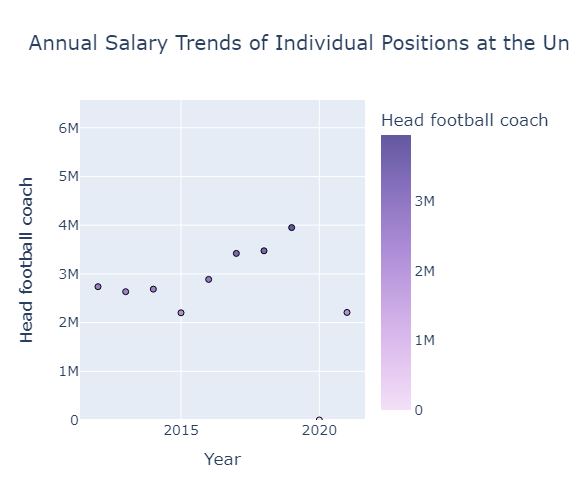

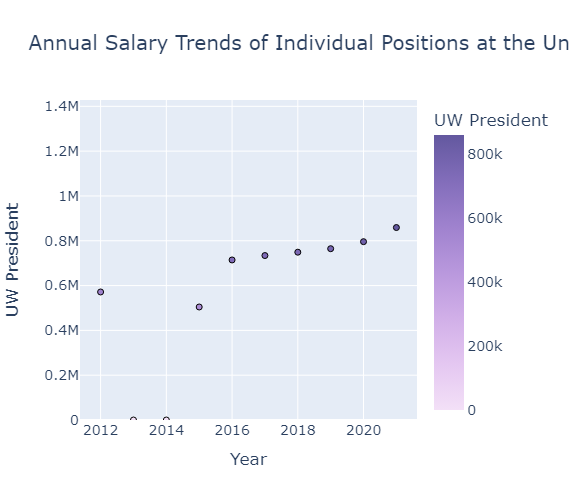

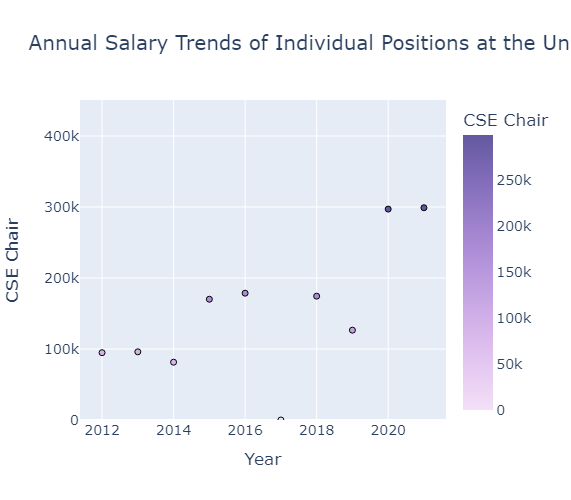

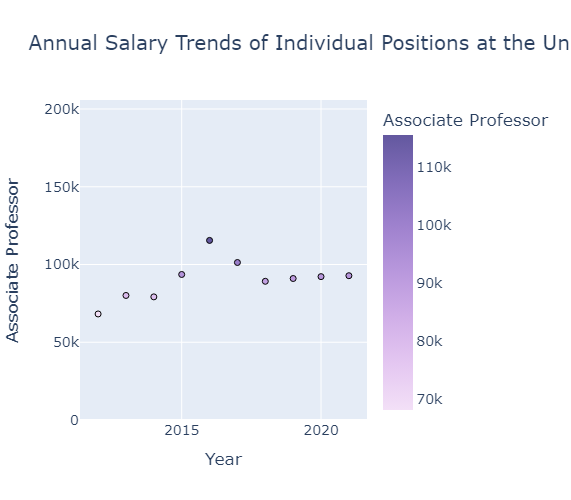

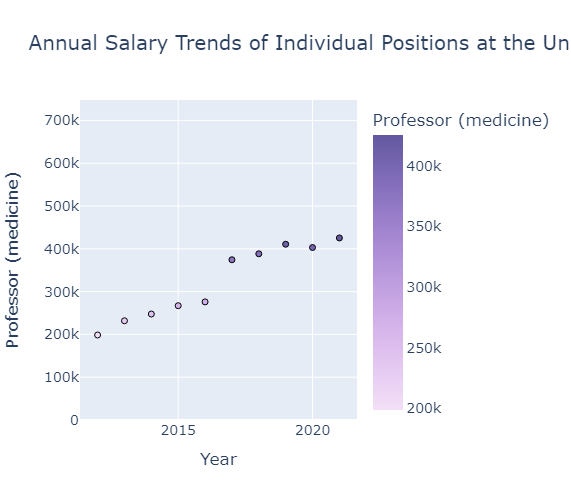

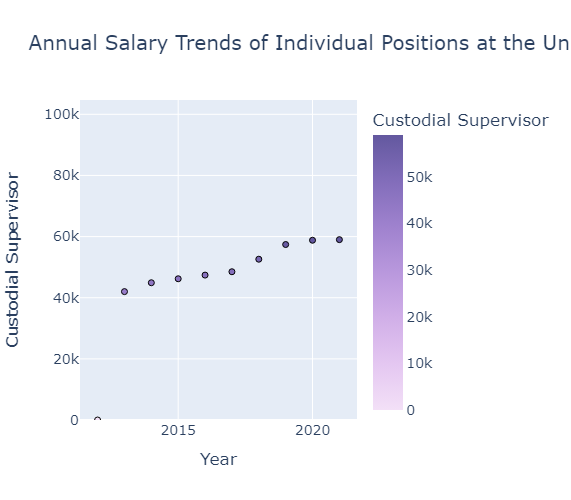

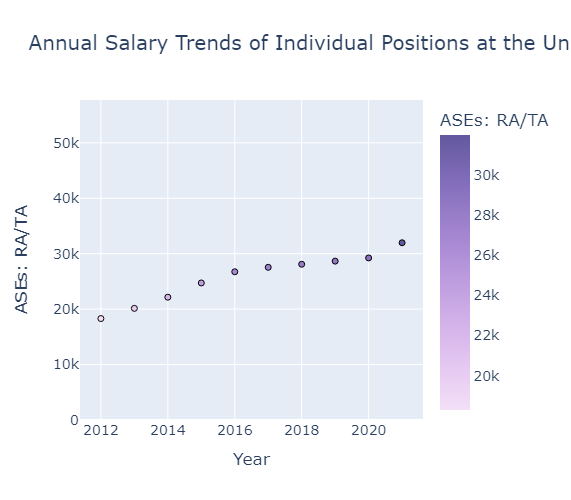

In [158]:
generate_plot2(df)

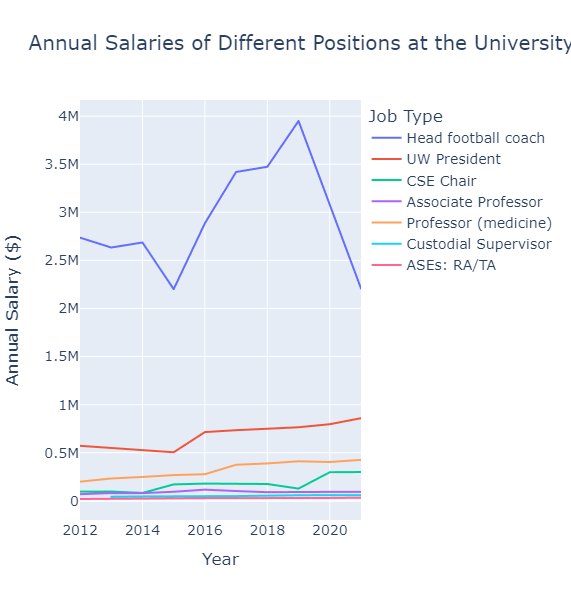

In [177]:
def generate_plot3(df):
    """
    Input: dataframe (csv file)
    
    Output: interactive figure comparing the annual salaries of different positions held at UW from 2012-2021
    
    Currently a line plot is being used but we can change it to a scatter plot, and adjust size of the markers to reflect salary.
    
    Able to click on specific job types in the legend, which will exclude that data and regenerate a new plot.
    That way, you are able to "zoom" in and compare the data for those with very low salaries. 
    """
    # Reshape the DataFrame to long format
    df_long = df.melt(id_vars=['Year '], var_name='Job Type', value_name='Annual Salary')
    df_long = df_long[df_long['Annual Salary'] != 0]
    # Plotting
    fig = px.line(df_long, x='Year ', y='Annual Salary', color='Job Type',
                  #size='Annual Salary', color_continuous_scale='purp',
                  color_discrete_sequence=px.colors.qualitative.Plotly,
                  title='Annual Salaries of Different Positions at the University of Washington:2012-2021',
                  labels={'Annual Salary': 'Annual Salary ($)'},
                  hover_name='Job Type',  # job type on hover
                  hover_data={'Year ': True, 'Annual Salary': True},  # display year and salary when hovered over
                  #opacity=0.7,  # marker opacity, if using scatter plot
                  render_mode='webgl'  # webgl for faster rendering
                    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Set marker outline to black
    fig.update_layout(
        width=1000,  # Set the width of the plot
        height=600,  # Set the height of the plot
        xaxis_title='Year',  # Set the x-axis title
        yaxis_title='Annual Salary ($)',  # Set the y-axis title
        font=dict(size=14)  # Set the font size
    )
    return fig

generate_plot3(df)